<a href="https://colab.research.google.com/github/ShaliniR8/lahman-mlb/blob/main/teams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture 
!wget https://github.com/ShaliniR8/lahman-mlb/raw/main/baseballdatabank_2022.zip
!unzip baseballdatabank_2022.zip 

In [ ]:
path = '/content/baseballdatabank-2022.2/core/'

In [ ]:
import pandas as pd
teams = pd.read_csv( path + "Teams.csv")
people = pd.read_csv( path + 'People.csv')

In [ ]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2985 non-null   int64  
 1   lgID            2935 non-null   object 
 2   teamID          2985 non-null   object 
 3   franchID        2985 non-null   object 
 4   divID           1468 non-null   object 
 5   Rank            2985 non-null   int64  
 6   G               2985 non-null   int64  
 7   Ghome           2586 non-null   float64
 8   W               2985 non-null   int64  
 9   L               2985 non-null   int64  
 10  DivWin          1440 non-null   object 
 11  WCWin           804 non-null    object 
 12  LgWin           2957 non-null   object 
 13  WSWin           2628 non-null   object 
 14  R               2985 non-null   int64  
 15  AB              2985 non-null   int64  
 16  H               2985 non-null   int64  
 17  2B              2985 non-null   i

In [ ]:
# drop columns not needed
drop = ['lgID', 'franchID', 'divID', 'teamIDBR', 'teamIDlahman45', 'teamIDlahman45', 'teamIDretro', 'name', 'park', 'DivWin', 'WCWin', 'LgWin', 'WSWin']
teams = teams.drop(columns = drop)

In [ ]:
# get stats from previous year than the one being predicted
join = ['teamID']
team_join_outer = pd.merge(teams, teams, how = 'outer', left_on=join, right_on=join)

In [ ]:
curr_year = team_join_outer['yearID_x']
prev_year = team_join_outer['yearID_y']
team_join_prev_year = team_join_outer[curr_year == prev_year + 1]

In [ ]:
cols_left = [ col for col in team_join_prev_year.columns.to_list() if '_x' in col ]
cols_left.remove('yearID_x')
cols_left.remove('W_x')
cols_left.remove('L_x')
team_join_prev_year = team_join_prev_year.drop(columns = cols_left)

In [ ]:


team_join_prev_year.head()

,yearID_x,teamID,W_x,L_x,yearID_y,Rank_y,G_y,Ghome_y,W_y,L_y,...,HA_y,HRA_y,BBA_y,SOA_y,E_y,DP_y,FP_y,attendance_y,BPF_y,PPF_y
5,1872,BS1,39,8,1871,3,31,NaN,20,10,...,367,2,42,23,243,24,0.834,NaN,103,98
11,1873,BS1,43,16,1872,1,48,NaN,39,8,...,443,0,27,29,280,44,0.875,NaN,105,100
17,1874,BS1,52,18,1873,1,60,NaN,43,16,...,708,5,42,55,472,54,0.836,NaN,106,100
23,1875,BS1,71,8,1874,1,71,NaN,52,18,...,779,1,23,31,489,53,0.850,NaN,105,98
28,1872,CL1,6,16,1871,8,29,NaN,10,19,...,346,13,53,34,234,15,0.818,NaN,96,100


In [ ]:
win_perc = team_join_prev_year['W_x'] / (team_join_prev_year['W_x'] + team_join_prev_year['L_x'])
team_join_prev_year['win_perc']  = win_perc
team_join_prev_year = team_join_prev_year.drop(columns = ['W_x', 'L_x', 'W_y', 'L_y'])
team_join_prev_year = team_join_prev_year.drop(columns = ['yearID_y'])


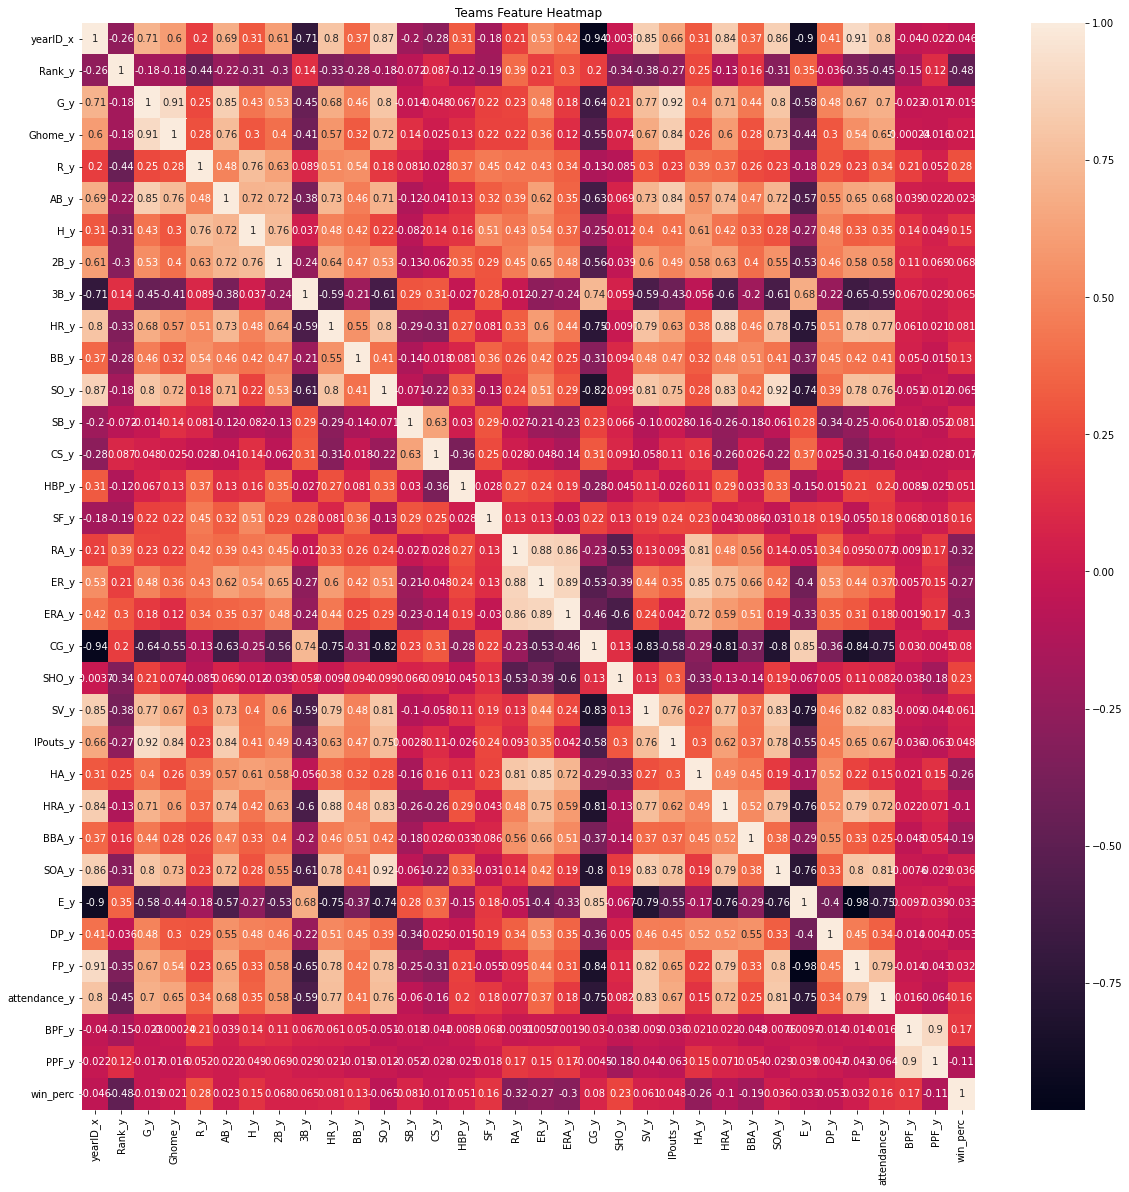

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 20))
sns.heatmap(team_join_prev_year.corr(method = 'spearman'), annot=True)
plt.title('Teams Feature Heatmap')
plt.savefig('fig5.jpg')
plt.show()